In [ ]:
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt

# Resolve project root as the parent of the notebooks/ directory
PROJECT_ROOT = Path(os.getcwd()).resolve().parent
print("PROJECT_ROOT:", PROJECT_ROOT)

# Add src/ to sys.path
SRC_DIR = PROJECT_ROOT / "src"
print("SRC_DIR:", SRC_DIR)
sys.path.append(str(SRC_DIR))

from data.load_movielens import load_ratings, load_movies

ratings = load_ratings()
movies = load_movies()

ratings.head(), movies.head()


PROJECT_ROOT: /Users/rishighesh/Data Science Mastery/E2E-Recommendation-System-for-Movies
SRC_DIR: /Users/rishighesh/Data Science Mastery/E2E-Recommendation-System-for-Movies/src


(   userId  movieId  rating   timestamp
 0       1      296     5.0  1147880044
 1       1      306     3.5  1147868817
 2       1      307     5.0  1147868828
 3       1      665     5.0  1147878820
 4       1      899     3.5  1147868510,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  )

In [7]:
# Key Statistics
n_users = ratings['userId'].nunique()
n_items = ratings['movieId'].nunique()
n_interactions = len(ratings)

sparsity = 1 - n_interactions / (n_users * n_items)

print("Users:", n_users)
print("Items:", n_items)
print("Interactions:", n_interactions)
print("Sparsity:", sparsity)


Users: 162541
Items: 59047
Interactions: 25000095
Sparsity: 0.9973951609474271


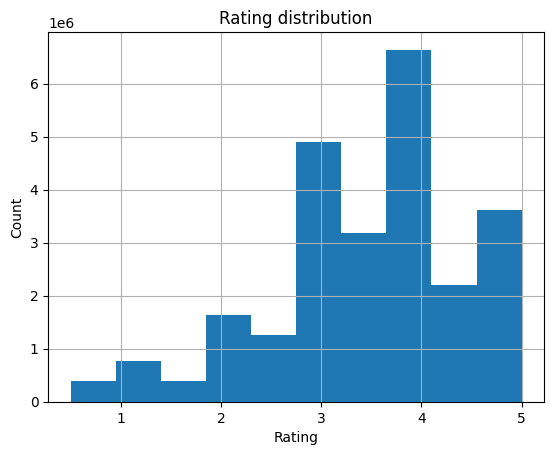

count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
25%          2.000000
50%          6.000000
75%         36.000000
max      81491.000000
Name: userId, dtype: float64

In [8]:
# Distribution Analysis
ratings['rating'].hist(bins=10)
plt.title("Rating distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

user_counts = ratings.groupby('userId')['movieId'].count()
user_counts.describe()

item_counts = ratings.groupby('movieId')['userId'].count()
item_counts.describe()


In [9]:
# Quick Join
df = ratings.merge(movies, on="movieId", how="left")
df.head()


,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance
